## Final Project

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from collections import Counter
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
netflix_data=pd.read_csv("dataset/netflix_titles.csv")
netflix_data.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [4]:
netflix_data.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [40]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_movies=netflix_data[netflix_data['type']=='Movie']

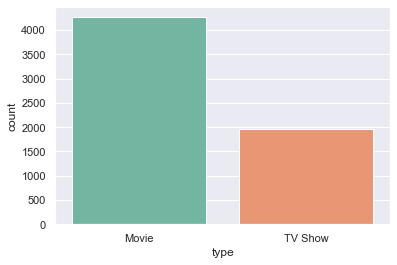

In [41]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")

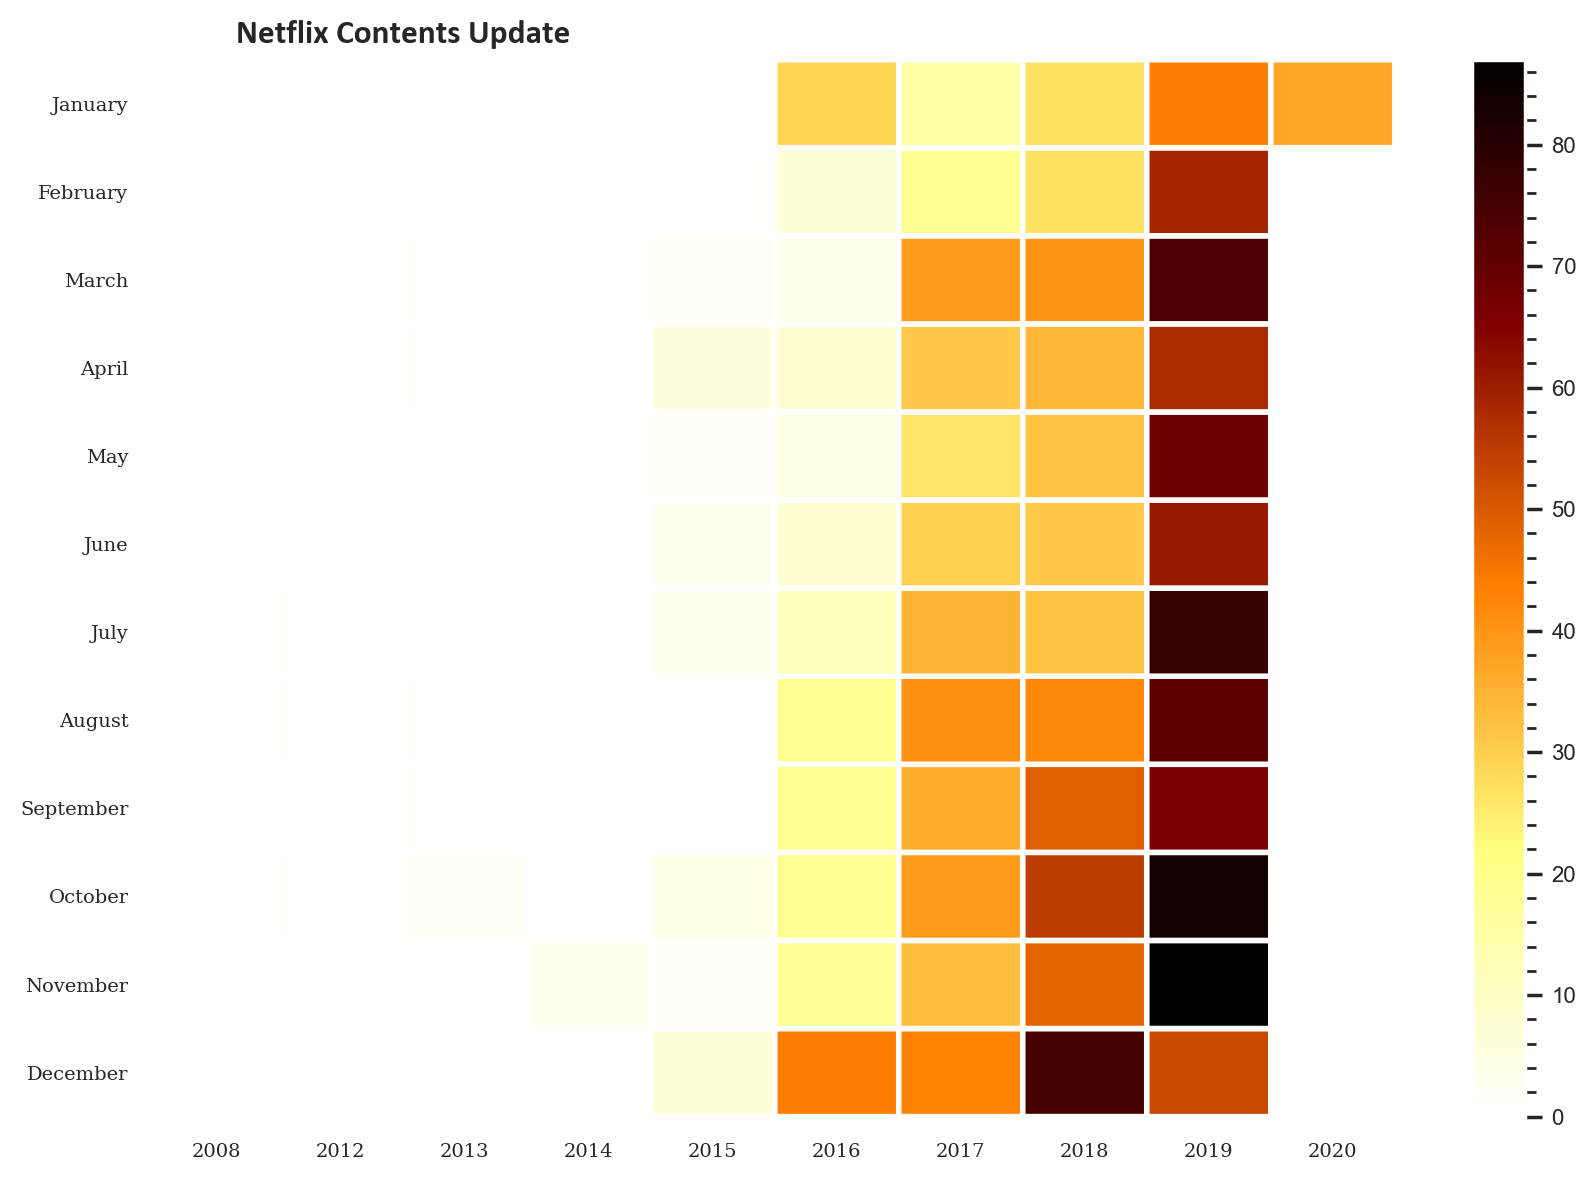

In [42]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = [
    'January', 
    'February', 
    'March', 
    'April', 
    'May', 
    'June', 
    'July', 
    'August', 
    'September', 
    'October', 
    'November', 
    'December'
][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

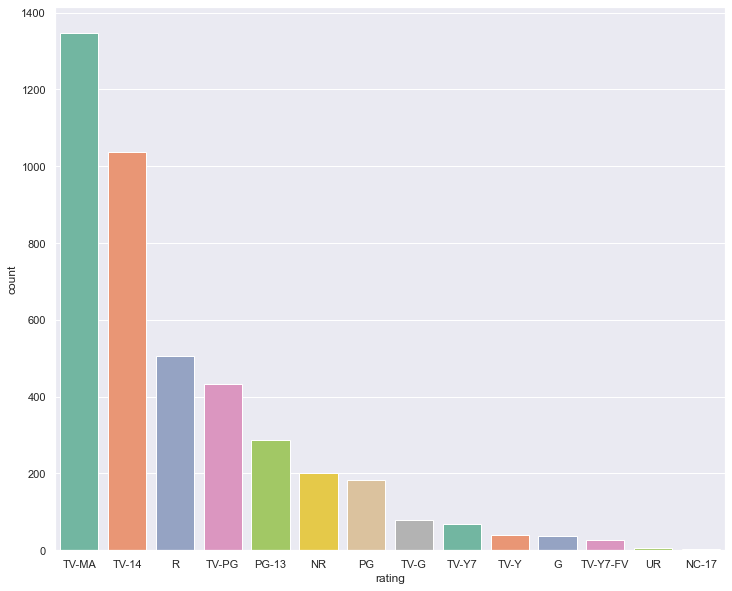

In [43]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

Jumlah film terbesar dibuat dengan rating 'TV-MA'. "TV-MA" adalah rating yang diberikan oleh TV Parental Guidelines untuk program televisi yang dirancang hanya untuk pemirsa dewasa.

Kedua terbesar adalah singkatan 'TV-14' untuk konten yang mungkin tidak sesuai untuk anak-anak di bawah usia 14 tahun.

Terbesar ketiga adalah rating 'R' yang sangat populer. Film dengan rating R adalah film yang telah dinilai memiliki materi yang mungkin tidak sesuai untuk anak di bawah usia 17 tahun oleh Motion Picture Association of America; MPAA menulis "Di bawah 17 tahun membutuhkan pendamping orang tua atau wali dewasa".

## Analisa Peringkat IMDB untuk mendapatkan film Netflix paling bagus

In [44]:
# import dataset
df_imdb_rating = pd.read_csv("dataset/imdb_ratings.csv", usecols=['weighted_average_vote'])
df_imdb_movies = pd.read_csv("dataset/imdb_movies.csv", usecols=['title','year','genre'])

D:\Python\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [45]:
df_imdb_rating.head()

weighted_average_vote
0                    5.9
1                    6.1
2                    5.8
3                    5.2
4                    7.0

In [46]:
df_imdb_movies.head()

title  year                      genre
0                   Miss Jerry  1894                    Romance
1  The Story of the Kelly Gang  1906    Biography, Crime, Drama
2               Den sorte drøm  1911                      Drama
3                    Cleopatra  1912             Drama, History
4                    L'Inferno  1911  Adventure, Drama, Fantasy

In [47]:
df_ratings = pd.DataFrame({
    'Title': df_imdb_movies.title,
    'Release Year': df_imdb_movies.year,
    'Rating': df_imdb_rating.weighted_average_vote,
    'Genre': df_imdb_movies.genre
})
df_ratings.drop_duplicates(
    subset=['Title','Release Year','Rating'], 
    inplace=True
)
df_ratings.shape

(85852, 4)

Melakukan join untuk mendapatkan konten yang memiliki peringkat di IMDB yang tersedia di Netflix.

In [48]:
df_ratings.dropna()
join_data=df_ratings.merge(netflix_data,left_on='Title',right_on='title',how='inner')
join_data=join_data.sort_values(by='Rating', ascending=False)

10 film dengan peringkat teratas di Netflix :

In [49]:
top_10_rated=join_data[0:10]
fig =px.sunburst(
    top_10_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

In [52]:
country_count=join_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

country
United States                      658
India                              608
United Kingdom                     106
Canada                              48
Philippines                         41
Spain                               40
South Korea                         31
Australia                           30
France                              29
Indonesia                           29
United Kingdom, United States       21

## Analisis tahun release film di Netflix

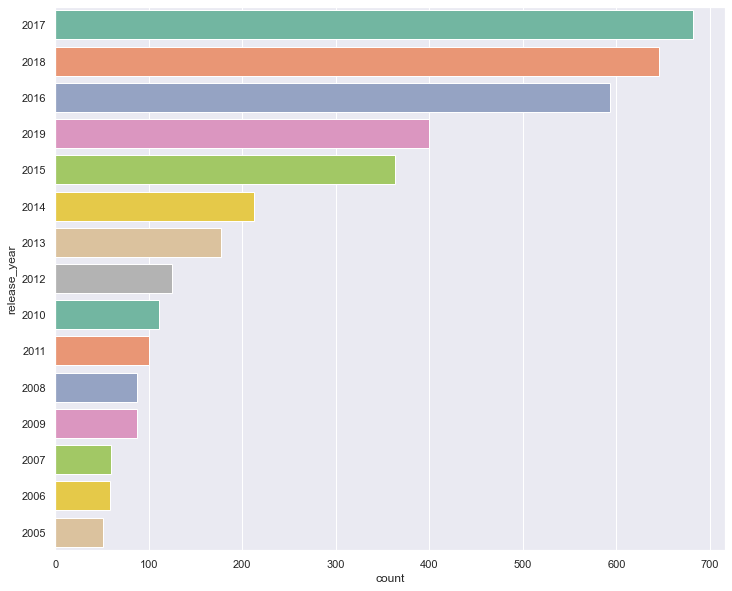

In [55]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(
    y="release_year", 
    data=netflix_movies, 
    palette="Set2", 
    order=netflix_movies['release_year'].value_counts().index[0:15]
)

## Top 10 negara konten film

In [58]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

<ipython-input-58-05759bc2aa29>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'India'),
 Text(9, 0, 'Australia')]

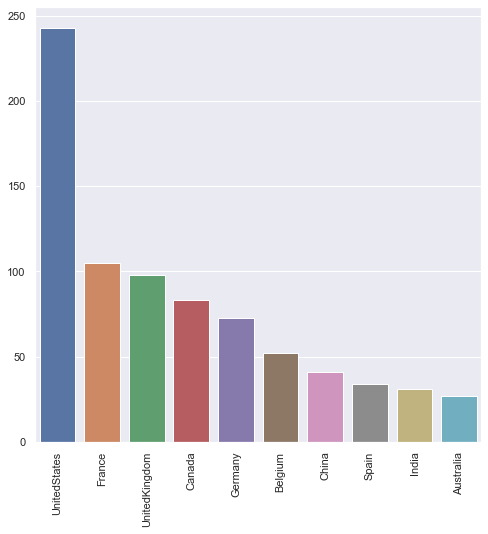

In [61]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

## WordCloud Genres.

In [65]:
genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

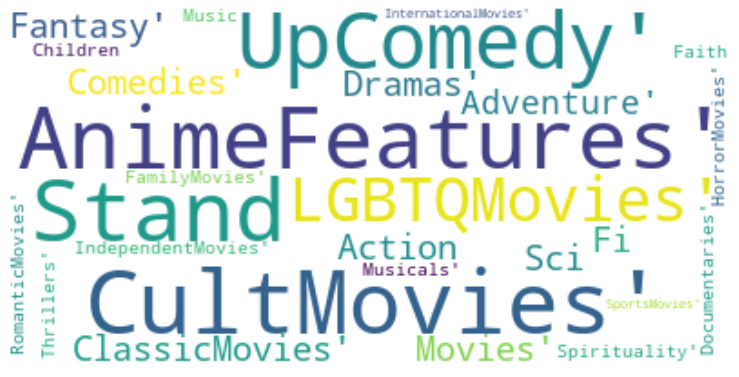

In [68]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Model Definition

In [71]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [72]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [73]:
netflix_data

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2                          NaN   
3                          NaN   
4             Fernando Lebrija   
...                        ...   
6229                       NaN   
6230                       NaN   
6231                       NaN   
6232                       NaN   
6233                       NaN   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                                NaN   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6229                             United States                NaN   
6230                             United States                NaN   
6231                                       NaN                NaN   
6232                            United Kingdom                NaN   
6233                             United States                NaN   

      release_year    rating    duration  \
0             2019     TV-PG      90 min   
1             2016     TV-MA      94 min   
2             2013  TV-Y7-FV    1 Season   
3             2016     TV-Y7    1 Season   
4             2017     TV-14      99 min   
...            ...       ...         ...   
6229          2015        NR  13 Seasons   
6230          2016     TV-MA   4 Seasons   
6231          2016       NaN      60 min   
6232          2013     TV-MA   2 Seasons   
6233          2003     TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233             

In [74]:
X = netflix_data.iloc[:,5:6].values
y = netflix_data.iloc[:,7:8].values
print(X[0])
print(y[0])

['United States, India, South Korea, China']
[2019]


In [75]:
# Training Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2,
    random_state=11
)
print("training size:", X_train.shape[0])
print("test size:", X_test.shape[0])

training size: 4987
test size: 1247


In [76]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    
    print("Training Performance")
    print("target: ", y_train)
    print("prediction: ", train_pred)
    print("accuracy score: ", train_acc)
    print("")
    print("Test Performance")
    print("target : ", y_test)
    print("prediction : ", test_pred)
    print("accuracy score : ", test_acc)
    
    print(classification_report(y_test, test_pred))

In [77]:
logistic = LogisticRegression()
train_model(logistic, X_train, X_test, y_train, y_test)

ValueError: could not convert string to float: 'United States'

In [80]:
dst = DecisionTreeClassifier()
train_model(dst, X_train, X_test, y_train, y_test)

ValueError: could not convert string to float: 'United States'

In [81]:
nb = GaussianNB()
train_model(nb, X_train, X_test, y_train, y_test)

ValueError: could not convert string to float: 'United States'